In [4]:
import pandas as pd
import numpy as np
import os, sys

In [10]:
os.chdir("/users/m/Dev/Data/datasets")
sys.path.append('/Users/m/dev/HappyData/healthdata-explore/modules')

In [5]:
# read the full NPDB malpractice dataset
dt = pd.read_csv("enigma-us.gov.hhs.npdb.report-full.csv")#,nrows=9999)

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (9,10,11,12,15,16,19,23,24,30,35,38,40,43,44,47,48,52,53,57,64,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
malp = dt[['alegatn1_text','outcome_text','pyrrltns_text','homestat','ptgender',
'paytype',
'grad',
'workstat',
'ptage_text',
'licnfeld_text',           
'origyear',
'npmalrpt',
'alegatn2_text',
'malyear2',
'payment',
'licnstat',
'malyear1',
'ptage',
'practage',
'algnnatr_text',
'totalpmt',
'rectype'   ,
'aaclass1_text',          
   'serialid' ]]
datacount=len(malp.index)
print "Read {0:,} rows from source".format(datacount)

Read 898,901 rows from source


In [4]:
## review column values and mappings
malp[ ['ptage','ptage_text'] ]
malp[ malp.ptage==0]['ptage_text'].head(3)

30     Under 1 year
284    Under 1 year
309    Under 1 year
Name: ptage_text, dtype: object

In [141]:
malp.rename(columns={'licnfeld_text':'doctype','practage':'docage','outcome_text':'outcome',
                     'aaclass1_text':'aatype', 'payment':'partpmt'},inplace=True)
malp.rename(columns={'alegatn1_text':'allegation1','alegatn2_text':'allegation2'},inplace=True)

#malp.columns

## Basic summary stats by column

In [159]:
# reload fresh module if needed
if 'pandasHelper' in sys.modules:
    del sys.modules['pandasHelper']

import pandasHelper as ph

In [139]:
#ph.printColumnCounts(dt,"licnfeld_text",70)
#dt.groupby(['licnfeld_text'])['licnfeld_text'].agg(['count']).reset_index().to_csv("doctypes.csv")

## MISC FINDINGS ##

-- oddly, no separate information for Ob/Gyn doctors


In [142]:
# by age of the patient
ph.printColumnCounts(malp,"ptage")
# age=1 (child)
# age=0 (baby)
# age=-1 (fetus)
# lots of NaN

# by doctor's specialization
ph.printColumnCounts(malp,"doctype",25)

# by alleged outcome
# TODO: drop records with really low counts, and likely missing other data
ph.printColumnCounts(malp,"outcome")

# by action type
# M+P   = malpractice
# A + C = adverse action
ph.printColumnCounts(malp,"rectype")



> Value distribution for: ptage
       count     pct
NaN  782,087  87.00%
 40   22,811   2.54%
 50   21,536   2.40%
 30   18,230   2.03%
 60   14,561   1.62%
 20   10,478   1.17%
 70    8,720   0.97%
 0     6,611   0.74%
 10    5,309   0.59%
 1     3,256   0.36%
 80    2,975   0.33%
-1     2,021   0.22%
 90      306   0.03%

> Value distribution for: doctype
                                                      count     pct
Allopathic Physician (MD)                           370,988  41.27%
Registered (RN) Nurse                               140,075  15.58%
LPN or Vocational Nurse                              87,390   9.72%
Dentist                                              72,312   8.04%
Nurses Aide                                          40,986   4.56%
Osteopathic Physician (DO)                           27,483   3.06%
Pharmacist                                           24,710   2.75%
Chiropractor                                         17,851   1.99%
Certified Nurse Aide/Nursin

In [160]:
ph.remapColumn(mp,'doctype','malp_map_doctype.csv')

Mapping: Allopathic Physician (MD) -> Physician
Mapping: Registered (RN) Nurse -> Nurse
Mapping: LPN or Vocational Nurse -> Nurse
Mapping: Dentist -> Dentist
Mapping: Nurses Aide -> Nurse
Mapping: Osteopathic Physician (DO) -> Osteopath
Mapping: Pharmacist -> Pharmacist
Mapping: Chiropractor -> Chiropractor
Mapping: Certified Nurse Aide/Nursing Assistant [availab... -> Nurse
Mapping: Podiatrist -> Podiatrist
Mapping: Pharmacy Technician [available 9/9/2002] -> Pharmacist
Mapping: Clinical Social Worker -> Social Worker
Mapping: Phys. Asst. Allopathic -> Physician Asst
Mapping: Physical Therapist -> PT
Mapping: Prof. Counselor -> Counselor
Mapping: Respiratory Therapist -> Resp Care
Mapping: Massage Therapist -> PT
Mapping: Psychologist [available 9/9/02] -> Psychologist
Mapping: Phys. Intern/Resident (MD) -> Physician
Mapping: Nurse Practitioner -> Nurse
Mapping: Clinical Psychologist [last use 9/9/02] -> Psychologist
Mapping: Prof. Cnslr Substance Abuse -> Counselor


/Users/m/dev/HappyData/healthdata-explore/modules/pandasHelper.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [144]:
ph.printColumnCounts(malp,"doctype",25)


> Value distribution for: doctype
                  count     pct
Physician       373,778  41.58%
Nurse           270,853  30.13%
Dentist          72,312   8.04%
Other            55,867   6.22%
Pharmacist       34,233   3.81%
Osteopath        27,483   3.06%
Chiropractor     17,851   1.99%
Podiatrist       10,743   1.20%
PT                8,299   0.92%
Counselor         6,864   0.76%
Social Worker     6,062   0.67%
Psychologist      5,284   0.59%
Physician Asst    4,814   0.54%
Resp Care         4,458   0.50%



## Examine the anomalies

In [173]:
# by doctor's specialization - for pre-birth only
ph.printColumnCounts(malpPmts[malpPmts.ptage==-1],"doctype",25)


> Value distribution for: doctype
                count     pct
Physician       1,717  84.96%
Osteopath         121   5.99%
Nurse              95   4.70%
Other              86   4.26%
Physician Asst      1   0.05%
PT                  1   0.05%



## Let's clean the data

In [145]:
# remap the recordType to distinguish between Adverse Actions and Payments
malp.replace({"rectype":{"A":"AdvAction", "C":"AdvAction", "M":"Payment", "P":"Payment"} }, inplace=True)

#printColumnCounts(malp,"rectype")
#malp[malp.rectype.isnull()].head(1000).to_csv("no_rectype.csv")
# 326 records with no type and no other data, so drop 'em
malp.dropna(subset=['rectype'],inplace=True)

ph.printColumnCounts(malp,"rectype")



> Value distribution for: rectype
             count     pct
AdvAction  524,232  58.34%
Payment    374,343  41.66%



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [146]:
# analyze different states available
print "Missing state values:\n", malp[['homestat','workstat','licnstat']].isnull().sum()
# fill in missing data in this order
# workstat, licnstat, homestat (pract.work state, licensed, home)
nostate = malp['workstat'].isnull()
malp.loc[nostate,'workstat'] = malp.loc[nostate,'licnstat']
nostate = malp['workstat'].isnull()
malp.loc[nostate,'workstat'] = malp.loc[nostate,'homestat']
nostate = malp['workstat'].isnull()
print "Setting remaining values to default: ", nostate.sum()
malp.loc[nostate,'workstat'] = 'NO' # last measure

Missing state values:
homestat    344588
workstat    388044
licnstat     60732
dtype: int64
Setting remaining values to default:  84


In [147]:
# check the year data
ph.showStatsMissing(malp,"origyear")
print "- Filling with 0"
malp.origyear.fillna(0, inplace=True)

# other fields are not helping to impute year, they are also NaN
#malp[malp.origyear.isnull()][ ['origyear','malyear1','malyear2', 'npmalrpt', 'grad']]
#

Column: "origyear" missing values: 0 (0.0%)

- Filling with 0


In [148]:
# check the payments info
# NOTE: we've discovered that a large number of records only pertain to Adverse Action against the
# practitioner, so no payment amount is expected
ph.showStatsMissing(malp[malp.rectype=="Payment"],"partpmt")
ph.showStatsMissing(malp[malp.rectype=="Payment"],"totalpmt")

malp[['partpmt','totalpmt']].head()
#print "Filling total pmt with 'payment'"
#malp1.totalpmt.fillna(malp1.payment,inplace=True)
#print "Missing total pmt: ",(malp1['totalpmt'].isnull().sum()), "total:", malp1['totalpmt'].sum()

Column: "partpmt" missing values: 26 (0.0%)

Column: "totalpmt" missing values: 250,692 (67.0%)



,partpmt,totalpmt
0,195000,NaN
1,12500,NaN
2,185000,NaN
3,1500,NaN
4,22500,22500


In [149]:
# fix the payment data
print "Filling total pmt with 'partpmt'"
malp.totalpmt.fillna(malp.partpmt,inplace=True)

# add 0's instead of NaN
malp.totalpmt.fillna(0,inplace=True)

# check for bad data, 0 or -ve payments
print "Records with payment <=0: ",(malp['totalpmt']<0).sum()

Filling total pmt with 'partpmt'
Records with payment <=0:  0


In [150]:
print "Sum by partpmt {0:,}".format(malp['partpmt'].sum())
print "Sum by totalpmt {0:,}".format(malp['totalpmt'].sum())

Sum by partpmt 80,854,770,700.0
Sum by totalpmt 82,424,951,250.0


### Rename key columns for easier analysis and split data set into payment/adv action

In [151]:
malp.rename(columns={'workstat':'state', 'totalpmt':'payment', 'origyear':'year'},inplace=True)

# Create a new series pertaining to claims with payment
malpPmts = malp[malp.rectype=="Payment"]
#malpPmts.head()
malpAA = malp[malp.rectype=="AdvAction"]

malpPmts.dropna(subset=['payment'],inplace=True)




/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [152]:
# NOTE: allegation1 is set only for (most) claims with payment award
ph.showStatsMissing(malpPmts,"allegation1")
ph.showStatsMissing(malpAA,"allegation1")

ph.showStatsMissing(malpPmts,"allegation2")
ph.printColumnCounts(malpPmts,"allegation1",10)



Column: "allegation1" missing values: 171 (0.0%)

Column: "allegation1" missing values: 524,232 (100.0%)

Column: "allegation2" missing values: 316,967 (84.7%)

> Value distribution for: allegation1
                                                     count     pct
Allegation – Not Otherwise Classified Specify       82,412  22.02%
Failure to Diagnose                                 60,076  16.05%
Improper Performance                                47,204  12.61%
Improper Management                                 25,772   6.88%
Delay in Diagnosis                                  22,273   5.95%
Improper Technique                                  22,073   5.90%
Wrong or Misdiagnosis (e.g. Original Diagnosis ...  10,873   2.90%
Failure to Treat                                     7,742   2.07%
Surgical or Other Foreign Body Retained              6,747   1.80%
Delay in Treatment                                   6,372   1.70%



### Create summary tables

In [74]:

# create summary a table by year. reset numeric index
# NOTE: we have values for year 0, but no payment details
pmtByYear = malpPmts.groupby('year')['payment'].agg(['sum', 'count','min','max']).reset_index()
print pmtByYear#.head(25)

    year         sum  count  min       max
0   1990   336745850   2856   50   4450000
1   1991  2320687700  17962    0   5250000
2   1992  2764114150  19758   50  13500000
3   1993  2886276450  19403    0  18500000
4   1994  3000798600  19626    0  12500000
5   1995  2922797500  17914    0   9350000
6   1996  3414540100  19143   50   7350000
7   1997  3337433100  18191   50  15500000
8   1998  3304179650  17499    0  10500000
9   1999  3629051350  18788   50  16500000
10  2000  4115237350  19248   50   9750000
11  2001  4822075050  20416    0  22500000
12  2002  4487482900  18862   50  13500000
13  2003  4846816150  18922   50  11500000
14  2004  4854025000  17643   50  27500000
15  2005  4693441100  17243   50  22500000
16  2006  4502392600  15788   50  16500000
17  2007  4246850000  14488   50  14500000
18  2008  4193403850  14114   50  15500000
19  2009  4073909450  13857   50  18500000
20  2010  3855145900  13239   50  22500000
21  2011  3841899100  12879   50  16500000
22  2012  1

In [18]:
# sample of the data we are going to be working with now
#malp[ ['state','year','payment'].format("{0:,}")

In [153]:
# create summary a table by state. reset numeric index
pmtByStateYear = malpPmts.groupby(['state','year'])['payment'].agg(['sum', 'count','min','max']).reset_index()
#pmtByStateYear
fmtCommas='{:,.0f}'.format
# TODO: function that takes a list of columns to format this way
print pmtByStateYear.head(20).to_string(formatters={'sum':fmtCommas,'min':fmtCommas,'max':fmtCommas})

# roll up to states
pmtByState = pmtByStateYear.groupby('state')['sum'].sum().reset_index()
# NOTE: we have 62 states (w/o NO) - how to validate? what are the extras?
print "Number of states (including NO): ", len(pmtByState)

   state  year       sum  count       min       max
0     AA  2007 2,150,000      1 2,150,000 2,150,000
1     AE  1992    23,750      2     6,250    17,500
2     AE  1993 2,377,800      8       300 1,850,000
3     AE  1996   448,750      4     6,250   285,000
4     AE  1997   412,500      3    72,500   195,000
5     AE  1999   195,000      1   195,000   195,000
6     AE  2001   957,500      5    47,500   325,000
7     AE  2003   150,000      3    12,500   125,000
8     AE  2004   145,000      1   145,000   145,000
9     AE  2005   740,000      3    47,500   645,000
10    AE  2006   185,000      2    87,500    97,500
11    AE  2007   980,000      2   245,000   735,000
12    AE  2008    12,500      1    12,500    12,500
13    AE  2009   130,000      2    32,500    97,500
14    AE  2010   595,000      1   595,000   595,000
15    AE  2012   860,000      4   215,000   215,000
16    AK  1991 3,403,250     17     1,500 1,850,000
17    AK  1992 3,236,750     31     2,500   775,000
18    AK  19

In [80]:
# first and last years look much smaller than the adjacent ones, so we'll remove 1990 and 2012
# from the charts - data may be incomplete
pmtByYear=pmtByYear[pmtByYear.year>1990]
pmtByYear=pmtByYear[pmtByYear.year<2012]
pmtByStateYear=pmtByStateYear[pmtByStateYear.year>1990]
pmtByStateYear=pmtByStateYear[pmtByStateYear.year<2012]


#print pmtByYear

In [81]:
# create a sorted list of payments by state
topStates=pmtByState.sort_values(by=['sum'],ascending=[False]).reset_index()
topStates.rename(columns={'workstat':'state','sum':'amount'},inplace=True)
#topStates

In [124]:
pmtByStateYearType = malp.groupby(['state','year','doctype','rectype'])['payment'].agg(['sum', 'count','min','max']).reset_index()
pmtByStateYearType.rename(columns={'sum':'amount'},inplace=True)

In [111]:
#malp[malp.year<1990]['year']
ph.printColumnCounts(pmtByStateYearType, "year")

> Value distribution for: year
      count    pct
2011  1,089  5.69%
2010  1,038  5.42%
2006  1,021  5.33%
2009  1,018  5.32%
2007  1,009  5.27%
2008  1,003  5.24%
2000    998  5.21%
2003    981  5.13%
2002    975  5.09%
2005    970  5.07%
2004    962  5.03%
2001    949  4.96%
2012    932  4.87%
1997    811  4.24%
1999    810  4.23%
1998    740  3.87%
1994    601  3.14%
1991    597  3.12%
1992    595  3.11%
1993    593  3.10%
1995    573  2.99%
1996    571  2.98%
1990    304  1.59%



In [85]:
print "Sum by year {0:,}".format(pmtByYear['sum'].sum())
print "Sum by state-year {0:,}".format(pmtByStateYear['sum'].sum())

Sum by year 80,112,557,050.0
Sum by state-year 80,112,557,050.0


In [169]:
# largest payments
#topPayments = malpPmts.sort_values(by=['payment'],ascending=[False]).reset_index().head(20)
#print topPayments.columns
print "Top payments over time\n", topPayments[['state','year','doctype','payment','ptage']]

Top payments over time
   state  year    doctype   payment  ptage
0     FL  2004  Physician  27500000      0
1     TX  2001  Physician  22500000    NaN
2     IA  2004  Osteopath  22500000      0
3     MN  2001      Nurse  22500000    NaN
4     TX  2001      Nurse  22500000    NaN
5     TX  2005  Physician  22500000     50
6     WI  2010  Physician  22500000     -1
7     TX  2001      Nurse  22500000    NaN
8     TX  2001  Physician  19500000    NaN
9     WI  1993  Physician  18500000    NaN
10    WI  2009      Other  18500000     -1
11    WI  2010  Physician  16500000      1
12    IL  2011      Nurse  16500000     40
13    TX  2004  Physician  16500000     20
14    IL  2006  Physician  16500000      0
15    IL  2011      Nurse  16500000     40
16    PA  1999  Physician  16500000    NaN
17    IL  2006  Physician  15500000     -1
18    IL  2008      Nurse  15500000     30
19    WI  1997  Physician  15500000    NaN


## Output results into a file

In [125]:
# map year and amount to integers (for ease of analysis in Tableau and remove first and last incomplete years)
pmtByStateYearType['year']=pmtByStateYearType['year'].map(int)
pmtByStateYearType['amount']=pmtByStateYearType['amount'].map(int)

pmtByStateYearType=pmtByStateYearType[pmtByStateYearType.year<2012]
pmtByStateYearType=pmtByStateYearType[pmtByStateYearType.year>1990]

pmtByStateYearType.to_csv("malpractice_history.csv")

In [155]:
pmtByDoctype = malp[malp.rectype=='Payment'].groupby(['doctype'])['payment'].agg(['sum', 'count','mean','median']).reset_index()

print pmtByDoctype.sort_values(by=['median'],ascending=[False]).reset_index()
pmtByDoctype.to_csv("malpractice_byDoctype.csv")

    index         doctype          sum   count           mean  median
0      12       Resp Care     18617300      49  379944.897959  195000
1       8       Physician  70861263050  275735  256990.454784  125000
2       4       Osteopath   4096394250   17807  230044.041669  115000
3       5           Other   1438523750    5747  250308.639290   92500
4       9  Physician Asst    325679850    1743  186850.172117   87500
5       3           Nurse   2089961100    7915  264050.675932   72500
6      10      Podiatrist    825606500    7726  106860.794719   52500
7      11    Psychologist    132597750    1239  107019.975787   42500
8       1       Counselor     20050350     234   85685.256410   32500
9      13   Social Worker     22327300     208  107342.788462   27500
10      0    Chiropractor    437397950    5869   74526.827398   22500
11      6              PT     68710250    1193   57594.509640   17500
12      2         Dentist   1978069850   46962   42120.647545   12500
13      7      Pharm

## Simple visualizations using Seaborn 

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Top states (all years)


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


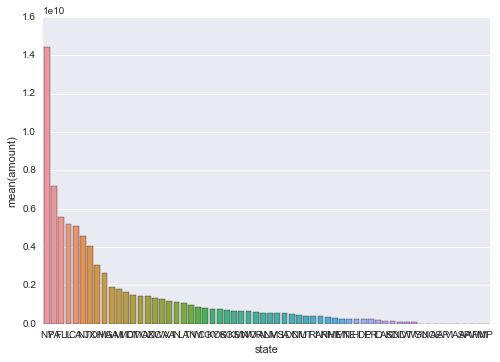

In [86]:
print "Top states (all years)"
sns.barplot(x="state", y="amount", data=topStates);

Plot of payments by year


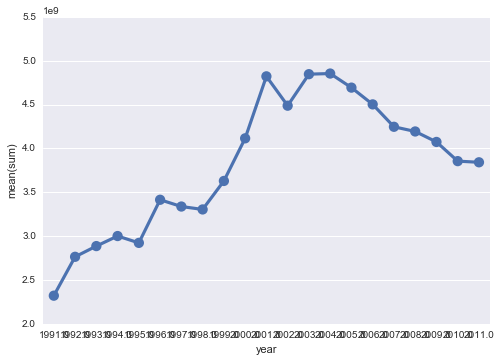

In [87]:
print "Plot of payments by year"
sns.pointplot(x="year", y="sum", data=pmtByYear.sort_values(by=['year'],ascending=[True]));

Plot of payments by state


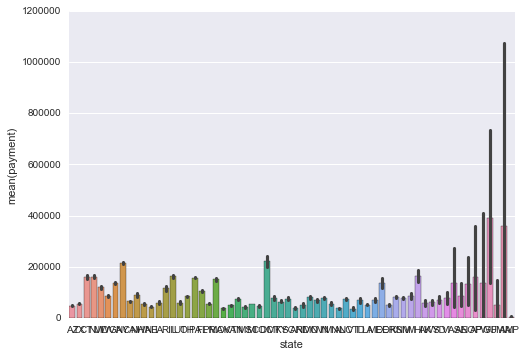

In [90]:
print "Plot of payments by state"
sns.barplot(x="state", y="payment", data=malp);

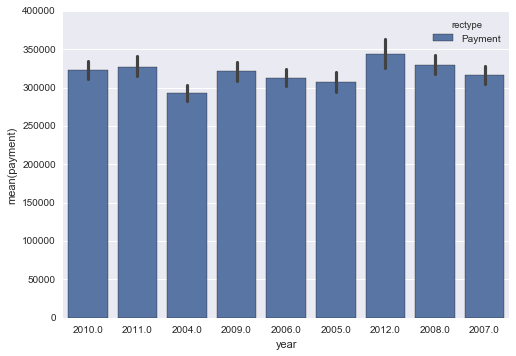

In [91]:
# totals for death-related allegations over time
# TODO: use sum, instead of mean()
sns.barplot(x="year", y="payment", hue="rectype", data=malp[malp.outcome=='Death'])

# Conclusions: 
# count and amount is fairly flat
# data only available from 2004

In [163]:
print malpPmts[malpPmts.outcome=='Death'].groupby('year')['payment'].agg(['sum', 'count','min','max']).reset_index()



   year         sum  count   min       max
0  2004  1300345900   4440    50   8750000
1  2005  1485586800   4844    50  22500000
2  2006  1365271000   4362    50   6950000
3  2007  1289903500   4077    50   4050000
4  2008  1328169850   4026    50  11500000
5  2009  1251520850   3895    50   5250000
6  2010  1218978100   3771    50   6950000
7  2011  1151933550   3517    50   7450000
8  2012   620969500   1806  2500   5950000


Plot of payments by year
Index([u'allegation1', u'outcome', u'pyrrltns_text', u'homestat', u'ptgender',
       u'paytype', u'grad', u'state', u'ptage_text', u'doctype', u'year',
       u'npmalrpt', u'allegation2', u'malyear2', u'partpmt', u'licnstat',
       u'malyear1', u'ptage', u'docage', u'algnnatr_text', u'payment',
       u'rectype', u'aatype', u'serialid'],
      dtype='object')


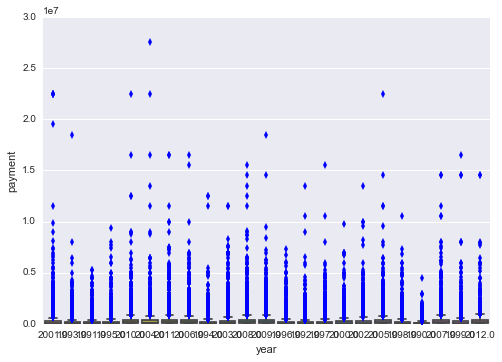

In [155]:
print "Plot of payments by year"
sns.boxplot(x="year", y="payment", data=malpPmts);

## Try interaction with ipywidgets

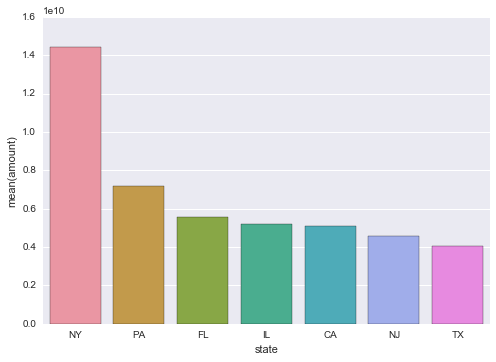

In [174]:
from ipywidgets import widgets  
def f(x):
    sns.barplot(x="state", y="amount", data=topStates.head(x));

widgets.interact(f, x=15)    

In [ ]:
from IPython.display import display
text=widgets.Text()
display(text)

def handle_submit(sender):
    val = int(text.value)
    print "Plotting top {0} states".format(val)
    sns.barplot(x="state", y="amount", data=topStates.head(val));

text.on_submit(handle_submit)